In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

# Load the given dataset about Iris flower

In [2]:
df = pd.read_csv('IRIS.csv')
df1 = df.copy(deep = True)
df2 = df.copy(deep = True)

In [3]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Analyse information from data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Describe the data

In [5]:
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Check the null value

In [6]:
df1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Divide the data numerical and categorical wise for univariate analysis

In [7]:
num = df1.select_dtypes(include = 'number')
cat = df1.select_dtypes(include = 'object')

# Box plot & Distribution analysis

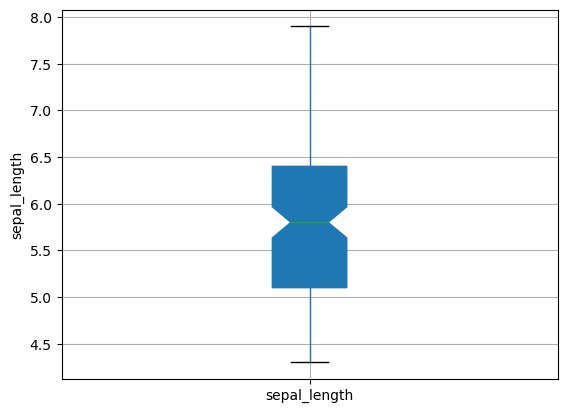

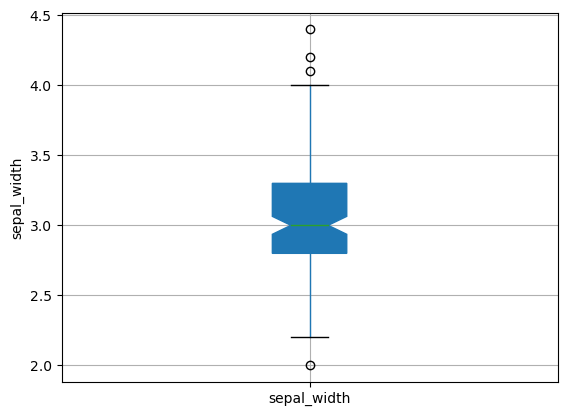

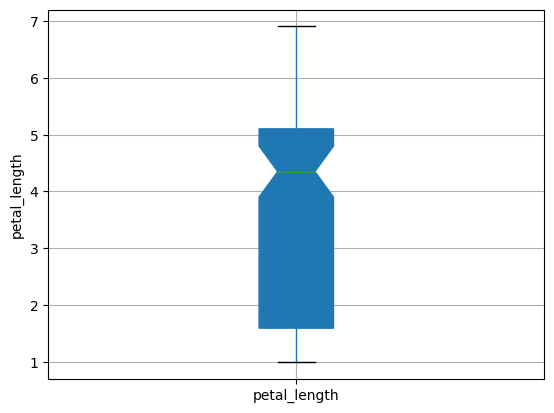

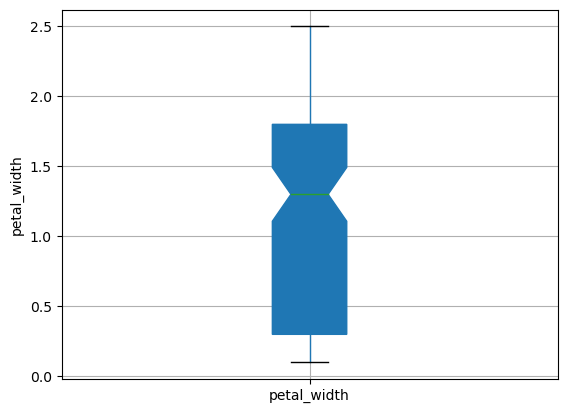

In [8]:
for i in num:
  num.boxplot(column = i, patch_artist = True, notch = True)
  plt.ylabel(i)
  plt.show()

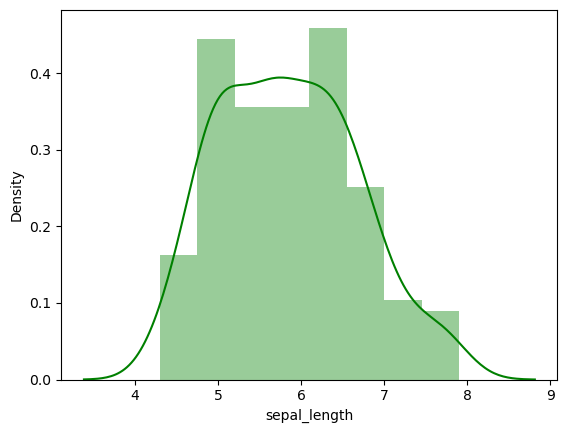

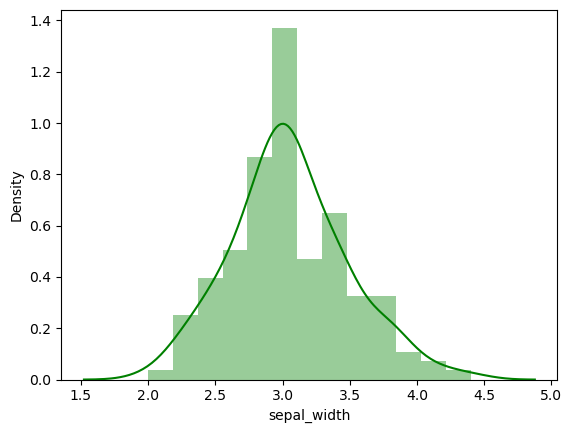

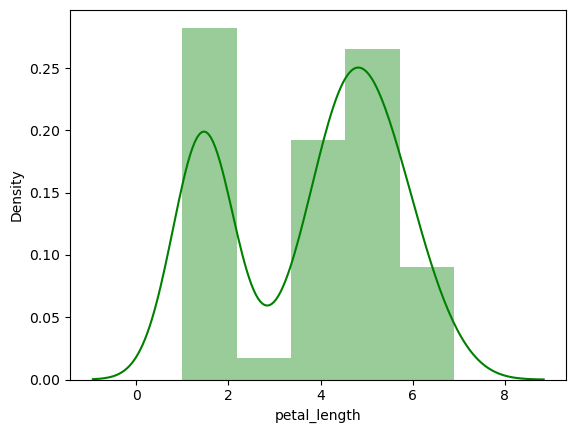

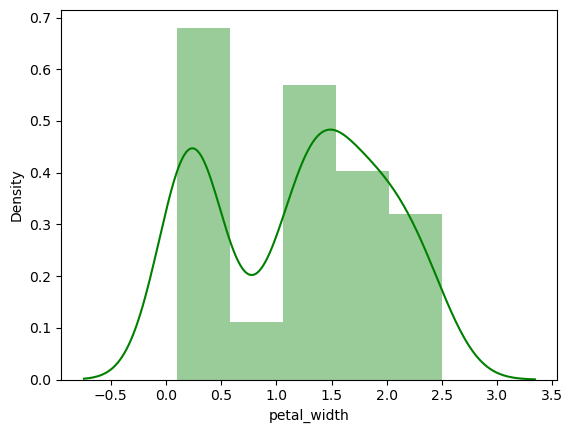

In [9]:
for i in num:
  sns.distplot(df1[i], kde = True, color = 'green')
  plt.show()

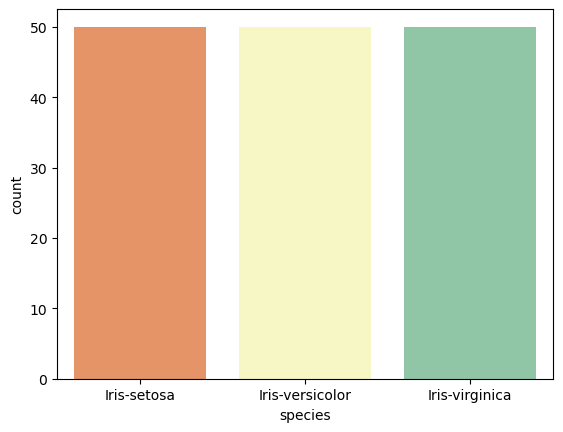

In [10]:
for i in cat:
  sns.countplot(x = df1[i], palette = 'Spectral')
  plt.show()

# Check and Remove Duplicate Rows data

In [11]:
df1[df1.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [13]:
df1[df1.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


# Working with Models

1) Create the target data and feature data where target data is species
2) Split the data into Training and testing Set
3) Create a Logistic regression model for Target and feature data
4) Display the Confusion Matrix
5) Find the Accuracy Score
6) Find the Cross Validation Score

# Create the target data and feature data where target data is species

In [14]:
x = df1.drop(['species'], axis = 1)
y = df1['species']

# Split the data into Training and testing Set 

In [15]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 69, stratify = y)

# Apply label-encoding on categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train_y)
train_y = enc.transform(train_y)
test_y = enc.transform(test_y)

In [17]:
train_y

array([1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0,
       1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 2])

In [18]:
train_x

,sepal_length,sepal_width,petal_length,petal_width
51,6.4,3.2,4.5,1.5
83,6.0,2.7,5.1,1.6
103,6.3,2.9,5.6,1.8
1,4.9,3.0,1.4,0.2
70,5.9,3.2,4.8,1.8
...,...,...,...,...
110,6.5,3.2,5.1,2.0
58,6.6,2.9,4.6,1.3
68,6.2,2.2,4.5,1.5
7,5.0,3.4,1.5,0.2


#  Create a Logistic regression model for Target and feature data

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Display the Confusion Matrix and Accuracy

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
model1 = LogisticRegression()
model1.fit(train_x, train_y)
pred1 = model1.predict(test_x)

c_matrix1 = confusion_matrix(test_y, pred1)
acc1 = accuracy_score(test_y, pred1)

print('confusion matrix is: \n', c_matrix1, '\n', 'and Accuracy is: \n', acc1)

confusion matrix is: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]] 
 and Accuracy is: 
 0.9333333333333333


# Cross Validation Score

In [21]:
print("Result",np.mean(cross_val_score(model1,x,y,scoring='accuracy',cv=36)))

Result 0.9583333333333334
